In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the QM7 dataset
data = scipy.io.loadmat('qm7.mat')
R = data['R']/2               # Shape: (7165, 23, 3) - 3D coordinates of atoms
Z = data['Z']               # Shape: (7165, 23) - Atomic numbers
T = data['T'].reshape(-1)   # Shape: (7165,) - Atomization energies

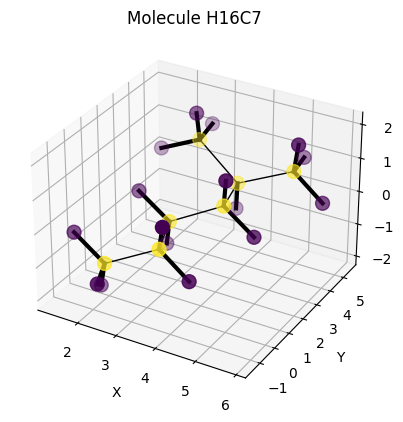

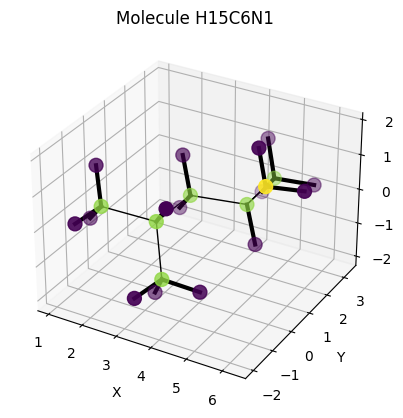

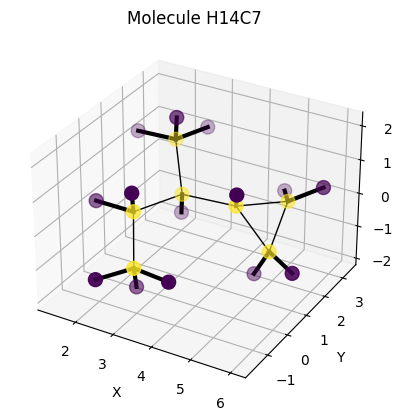

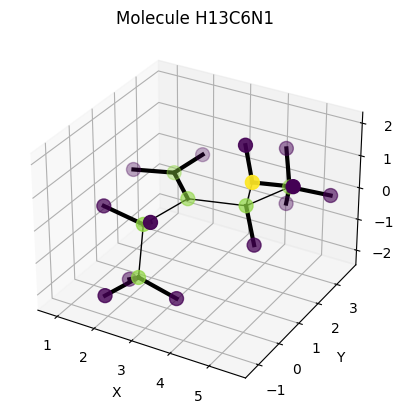

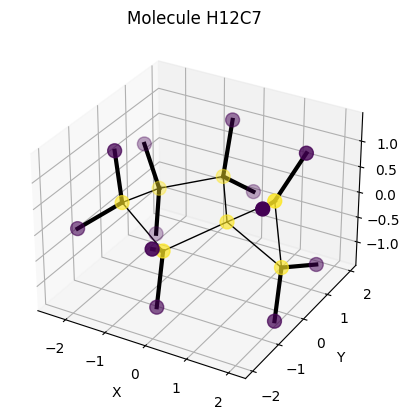

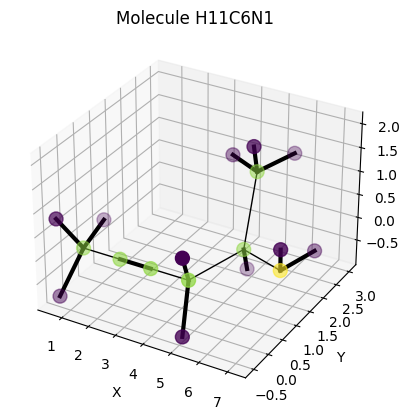

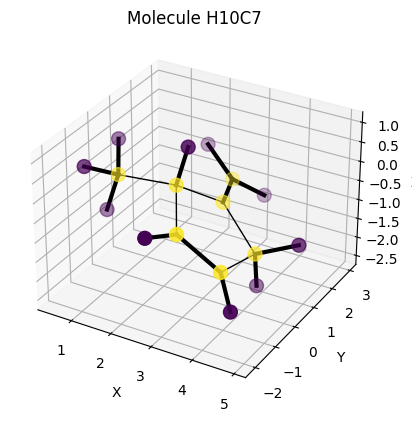

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a function to determine bond order based on distance
def determine_bond_order(distance):
    # These thresholds are heuristic and should ideally be determined more accurately
    if distance < 1.3:
        return 3  # Triple bond
    elif distance < 1.5:
        return 1  # Double bond
    elif distance < 7.5:
        return 0.3  # Single bond
    else:
        return 0  # No bond

# Define a function to visualize a molecule
def visualize_molecule(index, distance_threshold=1.5):
    molecule_coords = R[index]
    atomic_numbers = Z[index]

    # Filter out non-existent atoms (atomic number 0)
    mask = atomic_numbers != 0
    molecule_coords = molecule_coords[mask]
    atomic_numbers = atomic_numbers[mask]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(molecule_coords[:, 0], molecule_coords[:, 1], molecule_coords[:, 2],
               c=atomic_numbers, cmap='viridis', s=100)

    # Draw bonds based on distance and bond order
    for i in range(len(molecule_coords)):
        for j in range(i + 1, len(molecule_coords)):
            distance = np.linalg.norm(molecule_coords[i] - molecule_coords[j])
            if distance < distance_threshold:
                bond_order = determine_bond_order(distance)
                if bond_order > 0:
                    line_width = bond_order  # Thicker lines for multiple bonds
                    ax.plot([molecule_coords[i, 0], molecule_coords[j, 0]],
                            [molecule_coords[i, 1], molecule_coords[j, 1]],
                            [molecule_coords[i, 2], molecule_coords[j, 2]],
                            'k-', lw=line_width)

    element_dict = {1: 'H', 6: 'C', 7: 'N', 8: 'O', 16: 'S'}

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    molecule_name = ''.join([element_dict[atomic_number] + str(np.sum(atomic_numbers == atomic_number))
                             for atomic_number in np.unique(atomic_numbers)])
    plt.title(f'Molecule {molecule_name}')
    plt.show()

# Visualize example molecules
visualize_molecule(6482)
visualize_molecule(7136)
visualize_molecule(5493)
visualize_molecule(7160)
visualize_molecule(7164)
visualize_molecule(7151)
visualize_molecule(7163)


Number of molecules: 7165
Max number of atoms in a molecule: 23
3D coordinates shape: (7165, 23, 3)
Atomic numbers shape: (7165, 23)
Atomization energies shape: (7165,)
Unique atomic numbers and their counts:
Atomic number 1.0: 61959 occurrences
Atomic number 6.0: 35761 occurrences
Atomic number 7.0: 6655 occurrences
Atomic number 8.0: 5978 occurrences
Atomic number 16.0: 297 occurrences


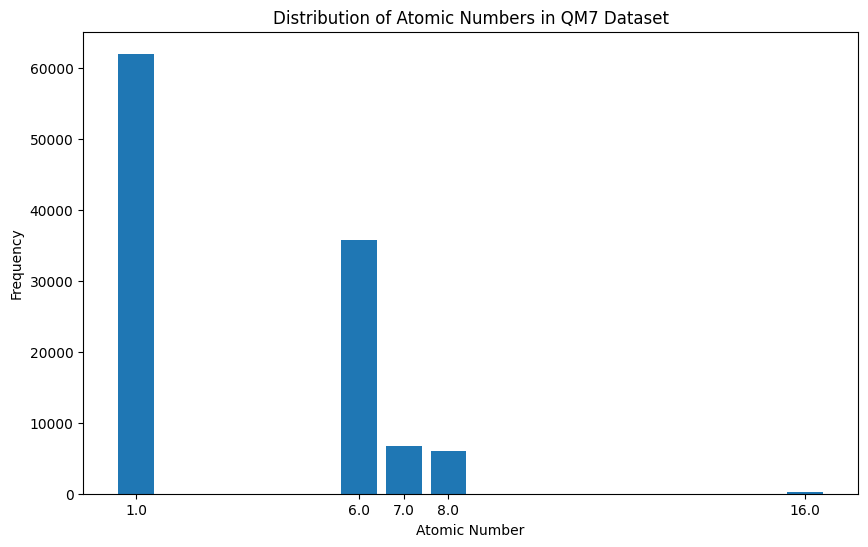

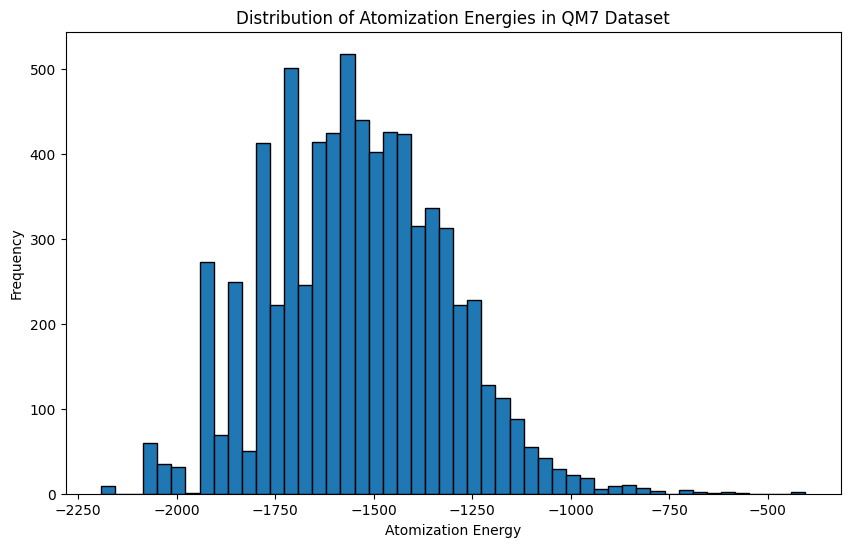

Average number of atoms per molecule: 15.44
Standard deviation of atoms per molecule: 2.68


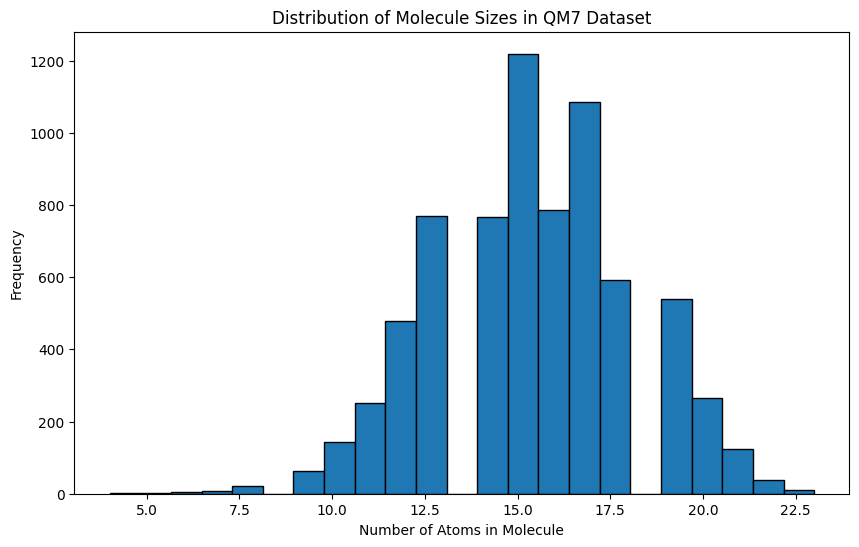

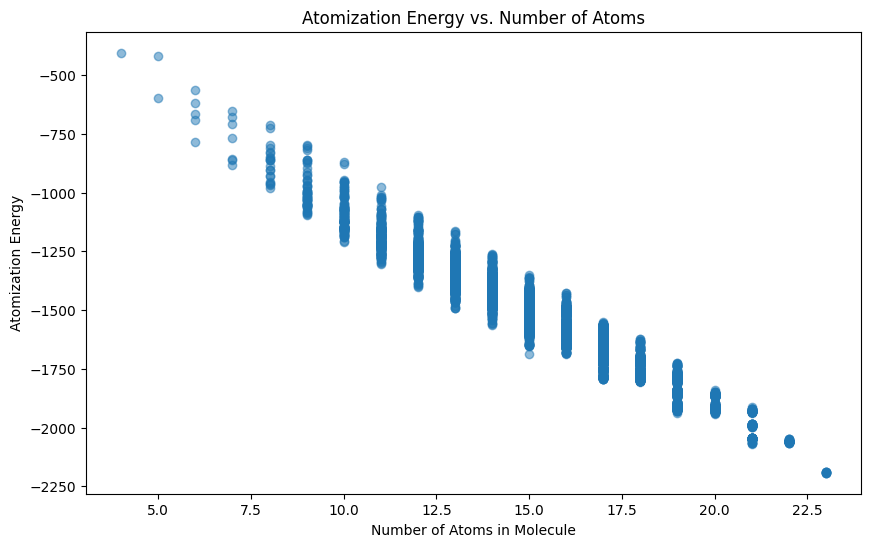

Example molecule 3D coordinates:
[[ 0.943219   -0.00232436 -0.0041196 ]
 [ 1.9749622  -0.00229602  0.00391173]
 [ 0.59884477  0.9702421   0.00391173]
 [ 0.59246695 -0.49863258  0.82969373]
 [ 0.6059974  -0.47948965 -0.855479  ]]
Example molecule atomic numbers:
[6. 1. 1. 1. 1.]


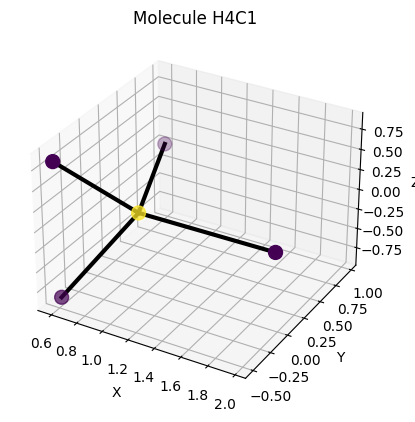

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Basic Dataset Information
print(f"Number of molecules: {R.shape[0]}")
print(f"Max number of atoms in a molecule: {R.shape[1]}")
print(f"3D coordinates shape: {R.shape}")
print(f"Atomic numbers shape: {Z.shape}")
print(f"Atomization energies shape: {T.shape}")

# Calculate the distribution of atomic numbers
unique_atomic_numbers, atomic_number_counts = np.unique(Z, return_counts=True)

# Filter out the atomic number 0, which represents non-existent atoms
valid_atomic_numbers = unique_atomic_numbers[unique_atomic_numbers != 0]
valid_atomic_number_counts = atomic_number_counts[unique_atomic_numbers != 0]

# Print the unique atomic numbers and their counts
print("Unique atomic numbers and their counts:")
for atomic_number, count in zip(valid_atomic_numbers, valid_atomic_number_counts):
    print(f"Atomic number {atomic_number}: {count} occurrences")

# Plot the distribution of atomic numbers
plt.figure(figsize=(10, 6))
plt.bar(valid_atomic_numbers, valid_atomic_number_counts, tick_label=valid_atomic_numbers)
plt.xlabel('Atomic Number')
plt.ylabel('Frequency')
plt.title('Distribution of Atomic Numbers in QM7 Dataset')
plt.show()

# Calculate the distribution of atomization energies
plt.figure(figsize=(10, 6))
plt.hist(T, bins=50, edgecolor='k')
plt.xlabel('Atomization Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Atomization Energies in QM7 Dataset')
plt.show()

# Analysis of molecule sizes
molecule_sizes = np.sum(Z != 0, axis=1)
print(f"Average number of atoms per molecule: {np.mean(molecule_sizes):.2f}")
print(f"Standard deviation of atoms per molecule: {np.std(molecule_sizes):.2f}")

# Plot the distribution of molecule sizes
plt.figure(figsize=(10, 6))
plt.hist(molecule_sizes, bins=23, edgecolor='k')
plt.xlabel('Number of Atoms in Molecule')
plt.ylabel('Frequency')
plt.title('Distribution of Molecule Sizes in QM7 Dataset')
plt.show()

# Scatter plot of atomization energy vs. number of atoms
plt.figure(figsize=(10, 6))
plt.scatter(molecule_sizes, T, alpha=0.5)
plt.xlabel('Number of Atoms in Molecule')
plt.ylabel('Atomization Energy')
plt.title('Atomization Energy vs. Number of Atoms')
plt.show()

# Analysis of molecule coordinates (example for the first molecule)
example_molecule_coords = R[0]
example_molecule_atomic_numbers = Z[0]

# Filter out non-existent atoms
mask = example_molecule_atomic_numbers != 0
example_molecule_coords = example_molecule_coords[mask]
example_molecule_atomic_numbers = example_molecule_atomic_numbers[mask]

print("Example molecule 3D coordinates:")
print(example_molecule_coords)
print("Example molecule atomic numbers:")
print(example_molecule_atomic_numbers)

# Scatter plot of the first molecule's 3D coordinates
visualize_molecule(0)


Feature vectors shape: (7165, 5)
Feature vector for the first molecule:
[4. 1. 0. 0. 0.]


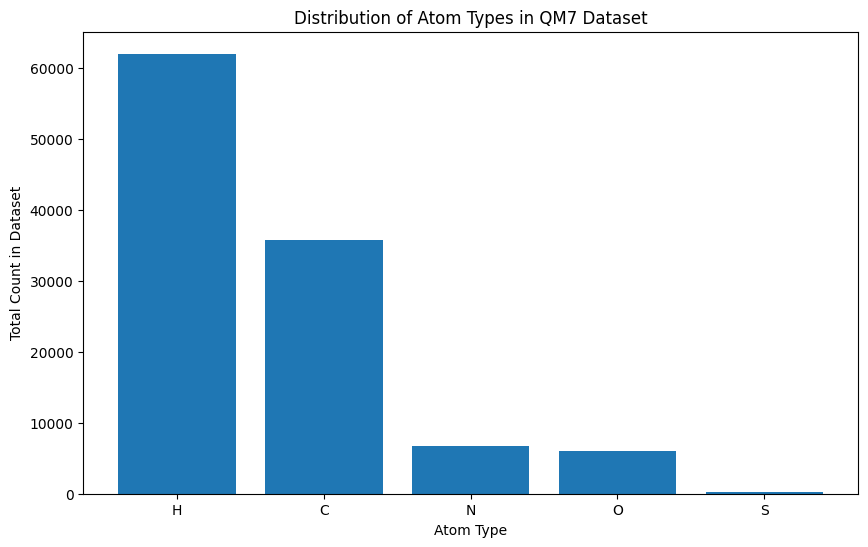

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Define the one-hot encoding function
def phi(atom_type):
    atom_types = [1, 6, 7, 8, 16]  # H, C, N, O, S
    one_hot = np.zeros(len(atom_types))
    if atom_type in atom_types:
        one_hot[atom_types.index(atom_type)] = 1
    return one_hot

# Generate the feature vector for a molecule
def molecule_representation(atom_types):
    feature_vector = np.zeros(len(phi(1)))  # Initialize with zeros of the size of one-hot encoding
    for atom in atom_types:
        feature_vector += phi(atom)
    return feature_vector

# Generate feature vectors for the entire dataset
feature_vectors = np.array([molecule_representation(molecule) for molecule in Z])

# Print the shape of the feature vectors array
print(f"Feature vectors shape: {feature_vectors.shape}")

# Example: print the feature vector for the first molecule
print("Feature vector for the first molecule:")
print(feature_vectors[0])

# Basic analysis: plot distribution of the summed feature vectors (i.e., number of each atom type in molecules)
atom_type_counts = np.sum(feature_vectors, axis=0)
atom_types = ['H', 'C', 'N', 'O', 'S']

plt.figure(figsize=(10, 6))
plt.bar(atom_types, atom_type_counts, tick_label=atom_types)
plt.xlabel('Atom Type')
plt.ylabel('Total Count in Dataset')
plt.title('Distribution of Atom Types in QM7 Dataset')
plt.show()


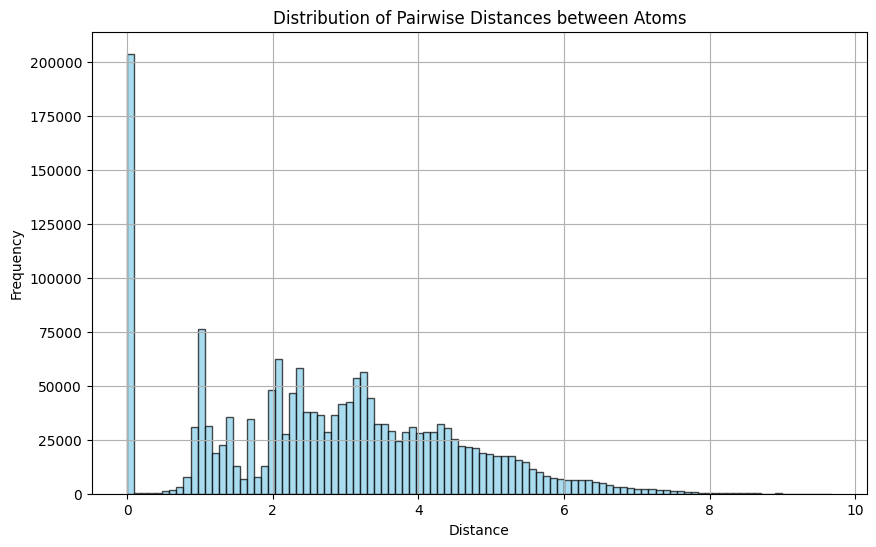

In [ ]:
# Define a function to calculate pairwise distances between atoms in a molecule
def calculate_pairwise_distances(coords):
    num_atoms = len(coords)
    distances = []
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = np.linalg.norm(coords[i] - coords[j])
            distances.append(distance)
    return distances

# Calculate pairwise distances for all molecules in the dataset
all_distances = []
for coords in R:
    distances = calculate_pairwise_distances(coords)
    all_distances.extend(distances)

# Plot a histogram of the distances
plt.figure(figsize=(10, 6))
plt.hist(all_distances, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise Distances between Atoms')
plt.grid(True)
plt.show()

Best lambda: 0.0020235896477251557
Best cross-validated MSE: 407.31742138865303
Final training MAE: 15.688020295404323


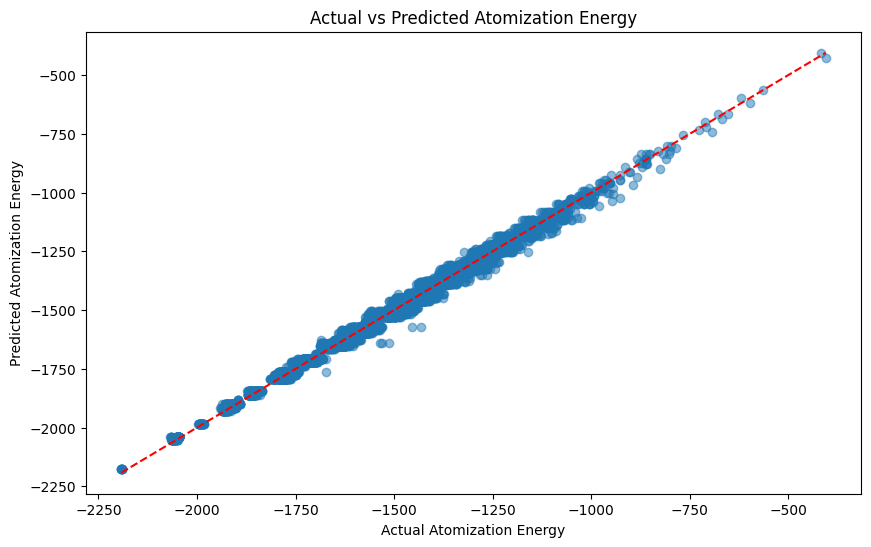

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the one-hot encoding function
def phi(atom_type):
    atom_types = [1, 6, 7, 8, 16]  # H, C, N, O, S
    one_hot = np.zeros(len(atom_types))
    if atom_type in atom_types:
        one_hot[atom_types.index(atom_type)] = 1
    return one_hot

# Generate the feature vector for a molecule
def molecule_representation(atom_types):
    feature_vector = np.zeros(len(phi(1)))  # Initialize with zeros of the size of one-hot encoding
    for atom in atom_types:
        feature_vector += phi(atom)
    return feature_vector

# Generate feature vectors for the entire dataset
feature_vectors = np.array([molecule_representation(molecule) for molecule in Z])

# Center the data
X = feature_vectors
y = T

# Center the features and target values
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y)
X_centered = X - X_mean
y_centered = y - y_mean

# Function to perform ridge regression using the closed-form solution
def ridge_regression(X, y, lambda_reg):
    n_features = X.shape[1]
    I = np.eye(n_features)
    w = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    return w

# Function to evaluate the model using cross-validation
def cross_validate(X, y, lambdas, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    best_lambda = None
    best_score = float('inf')
    for lambda_reg in lambdas:
        mse_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            w = ridge_regression(X_train, y_train, lambda_reg)
            y_pred = X_val @ w
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        mean_mse = np.mean(mse_scores)
        if mean_mse < best_score:
            best_score = mean_mse
            best_lambda = lambda_reg
    return best_lambda, best_score

# Define the range of lambda values to test
lambdas = np.logspace(-4, 4, 50)

# Perform cross-validation to find the best lambda
best_lambda, best_score = cross_validate(X_centered, y_centered, lambdas)
print(f'Best lambda: {best_lambda}')
print(f'Best cross-validated MSE: {best_score}')

# Train the final model with the best lambda
w = ridge_regression(X_centered, y_centered, best_lambda)

# Predict the atomization energies on the training set
y_pred = X_centered @ w + y_mean

# Calculate and print the final training MAE
final_mse_1 = mean_absolute_error(y, y_pred)
print(f'Final training MAE: {final_mse_1}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Actual Atomization Energy')
plt.ylabel('Predicted Atomization Energy')
plt.title('Actual vs Predicted Atomization Energy')
plt.show()


In [ ]:
import scipy.io
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
import plotly.io as pio

# Define the atomic symbols dictionary
atomic_symbols = {0: 'H', 1: 'C', 2: 'N', 3: 'O', 4: 'S'}

# Perform PCA on the feature vectors
pca = PCA(n_components=2)
feature_vectors_pca = pca.fit_transform(X_centered)

# Calculate the contributions of each atom to the energy scores
def calculate_atom_contributions(w, feature_vectors):
    atom_contributions = feature_vectors * w
    return atom_contributions

# Calculate atom contributions to energy scores
atom_contributions = calculate_atom_contributions(w, feature_vectors)

# Normalize contributions
normalized_contributions = []
for contributions in atom_contributions:
    abs_sum = np.sum(np.abs(contributions))
    normalized_contributions.append(np.abs(contributions) / abs_sum)

# Function to generate atomic composition string
def atomic_composition(index, feature_vectors, atomic_symbols):
    counts = feature_vectors[index].astype(int)
    composition = ''.join([f'{symbol}{count}' for symbol, count in zip(atomic_symbols.values(), counts) if count > 0])
    return composition

# Create a DataFrame with the PCA results, the normalized energy scores, and the normalized atom contributions
pca_df = pd.DataFrame(feature_vectors_pca, columns=['PC1', 'PC2'])
pca_df['Energy Score'] = y_pred

# Add normalized atom contributions to DataFrame
for i, symbol in atomic_symbols.items():
    pca_df[f'{symbol} Contribution'] = [c[i] if i < len(c) else np.nan for c in normalized_contributions]

# Add atomic composition to the DataFrame
pca_df['Composition'] = [atomic_composition(i, feature_vectors, atomic_symbols) for i in range(len(feature_vectors))]

# Ensure the 'hover_name' field is in string format to avoid issues
pca_df.index = pca_df.index.astype(str)

# Plot the scatter plot
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Energy Score', hover_data={
    'PC1': False,
    'PC2': False,
    'Energy Score': True,
    'H Contribution': True,
    'C Contribution': True,
    'N Contribution': True,
    'O Contribution': True,
    'S Contribution': True,
    'Composition': True,
}, hover_name=pca_df.index,
                 labels={'Energy Score': 'Energy Score',
                         'PC1': 'Principal Component 1',
                         'PC2': 'Principal Component 2'})

# Update the hover template
hover_template = '<b>Molecule Index:</b> %{hovertext}<br>' + \
                 '<b>Composition:</b> %{customdata[6]}<br>' + \
                 '<b>Energy Score:</b> %{customdata[0]:.4f}<br>' + \
                 '<b>H Contribution:</b> %{customdata[1]:.4f}<br>' + \
                 '<b>C Contribution:</b> %{customdata[2]:.4f}<br>' + \
                 '<b>N Contribution:</b> %{customdata[3]:.4f}<br>' + \
                 '<b>O Contribution:</b> %{customdata[4]:.4f}<br>' + \
                 '<b>S Contribution:</b> %{customdata[5]:.4f}<extra></extra>'
fig.update_traces(hovertemplate=hover_template)

# Show the plot
fig.show()

# Save the plot as an HTML file
pio.write_html(fig, 'pca_plot.html')

print("Plot saved as 'pca_plot.html'.")


Plot saved as 'pca_plot.html'.


Best lambda: 0.3593813663804626
Best cross-validated MSE: 112.82533232376836
Final training MAE: 3.6910350697257766


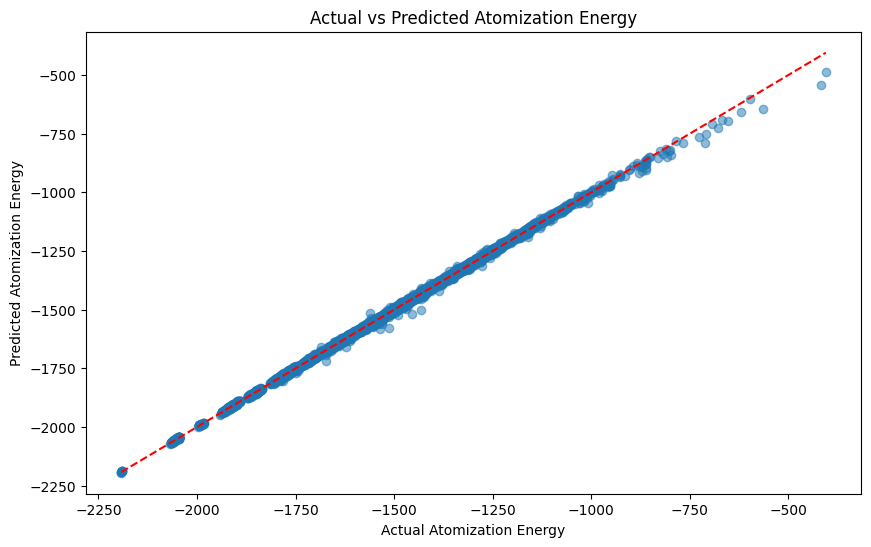

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import combinations

# Define the one-hot encoding function for atom types
def phi_atom_type(atom_type1, atom_type2):
    atom_types = [(1, 1), (1, 6), (1, 7), (1, 8), (1, 16), (6, 6), (6, 7), (6, 8), (6, 16),
                  (7, 7), (7, 8), (7, 16), (8, 8), (8, 16), (16, 16)]
    one_hot = np.zeros(len(atom_types))
    if (atom_type1, atom_type2) in atom_types:
        index = atom_types.index((atom_type1, atom_type2))
    elif (atom_type2, atom_type1) in atom_types:
        index = atom_types.index((atom_type2, atom_type1))
    else:
        index = -1
    if index != -1:
        one_hot[index] = 1
    return one_hot

# Define the one-hot encoding function for distance intervals with soft indicators
def phi_distance(distance, thresholds):
    num_intervals = len(thresholds) + 1
    one_hot = np.zeros(num_intervals)

    # Calculate Gaussian scaling factor based on the number of intervals
    gaussian_scale = np.sqrt(2 * np.pi) * (thresholds[1] - thresholds[0]) * num_intervals

    for i in range(num_intervals):
        if i == 0:
            if distance <= thresholds[i]:
                one_hot[i] = np.exp(-((distance - thresholds[i]) ** 2) / gaussian_scale)
        elif i == num_intervals - 1:
            if distance > thresholds[i - 1]:
                one_hot[i] = np.exp(-((distance - thresholds[i - 1]) ** 2) / gaussian_scale)
        else:
            if thresholds[i - 1] < distance <= thresholds[i]:
                one_hot[i] = np.exp(-((distance - (thresholds[i - 1] + thresholds[i]) / 2) ** 2) / gaussian_scale)

    # Normalize to ensure the sum is 1 across all intervals
    one_hot /= np.sum(one_hot)

    return one_hot

# Generate the feature vector for a molecule based on atom pairs
def molecule_representation_pairs(coords, atom_types, thresholds):
    feature_vector_length = len(phi_atom_type(1, 1)) * (len(thresholds) + 1)
    num_pairs = len(atom_types) * (len(atom_types) - 1) // 2
    feature_vector = np.zeros(feature_vector_length)
    pair_index = 0
    for i, j in combinations(range(len(atom_types)), 2):
        if atom_types[i] != 0 and atom_types[j] != 0:
            distance = np.linalg.norm(coords[i] - coords[j])
            atom_type_encoding = phi_atom_type(atom_types[i], atom_types[j])
            distance_encoding = phi_distance(distance, thresholds)
            pair_feature = np.outer(atom_type_encoding, distance_encoding).flatten()
            feature_vector += pair_feature
            pair_index += 1
    return feature_vector

# Center the data
y = T
y_mean = np.mean(y)
y_centered = y - y_mean

# Function to perform ridge regression using the closed-form solution
def ridge_regression(X, y, lambda_reg):
    n_features = X.shape[1]
    I = np.eye(n_features)
    w = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    return w

# Function to evaluate the model using cross-validation
def cross_validate(X, y, lambdas, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    best_lambda = None
    best_score = float('inf')
    for lambda_reg in lambdas:
        mse_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            w = ridge_regression(X_train, y_train, lambda_reg)
            y_pred = X_val @ w
            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        mean_mse = np.mean(mse_scores)
        if mean_mse < best_score:
            best_score = mean_mse
            best_lambda = lambda_reg
    return best_lambda, best_score

# Define the range of lambda values to test
lambdas = np.logspace(-4, 4, 10)
thresholds = np.linspace(0, 3.5, 200)  # Define the thresholds for distance binning

# Generate feature vectors for the entire dataset using all thresholds
feature_vectors = np.array([molecule_representation_pairs(R[i], Z[i], thresholds) for i in range(len(R))])

# Center the features
X_mean = np.mean(feature_vectors, axis=0)
X_centered = feature_vectors - X_mean

# Perform cross-validation to find the best lambda
best_lambda, best_score = cross_validate(X_centered, y_centered, lambdas)
print(f"Best lambda: {best_lambda}")
print(f"Best cross-validated MSE: {best_score}")

# Train the final model with the best lambda
w = ridge_regression(X_centered, y_centered, best_lambda)

# Predict the atomization energies on the training set
y_pred = X_centered @ w + y_mean

# Calculate and print the final training MSE
final_mse = mean_absolute_error(y, y_pred)
print(f"Final training MAE: {final_mse}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Actual Atomization Energy')
plt.ylabel('Predicted Atomization Energy')
plt.title('Actual vs Predicted Atomization Energy')
plt.show()


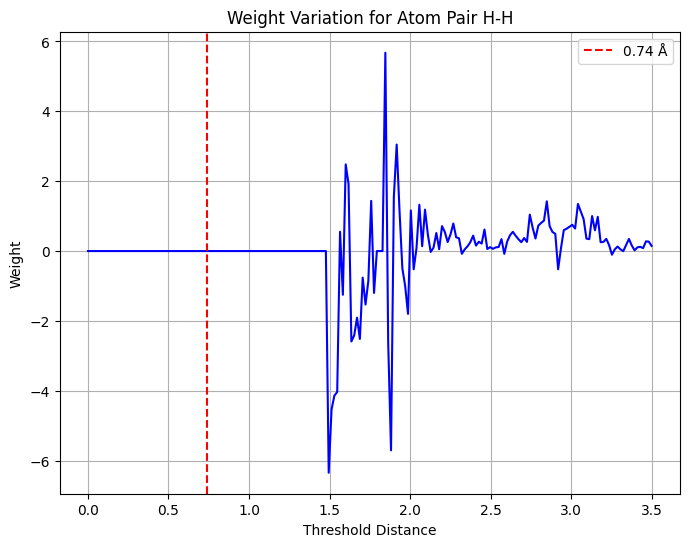

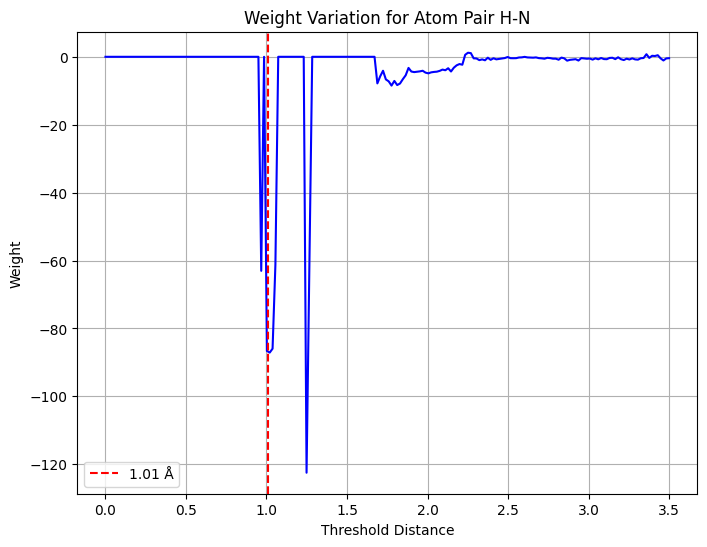

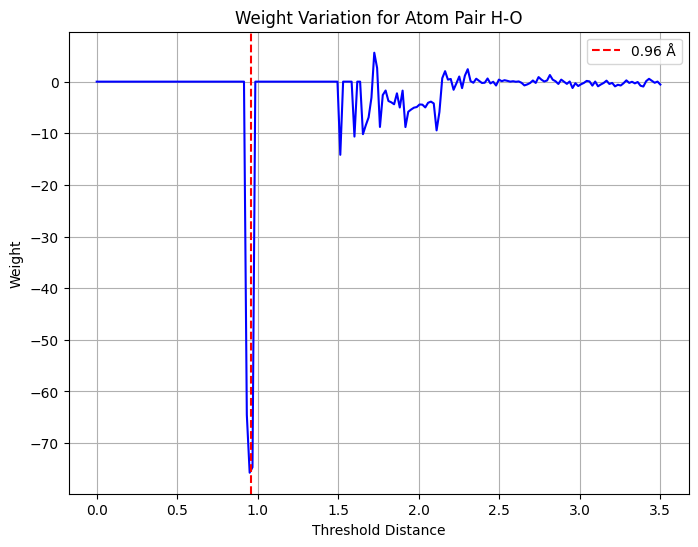

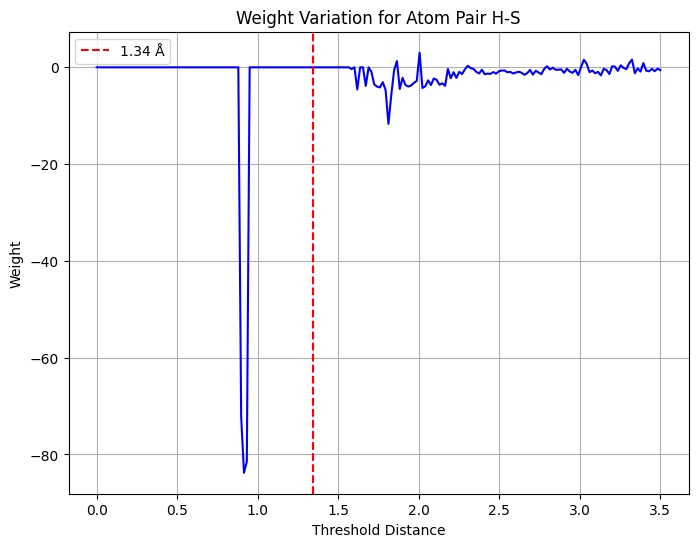

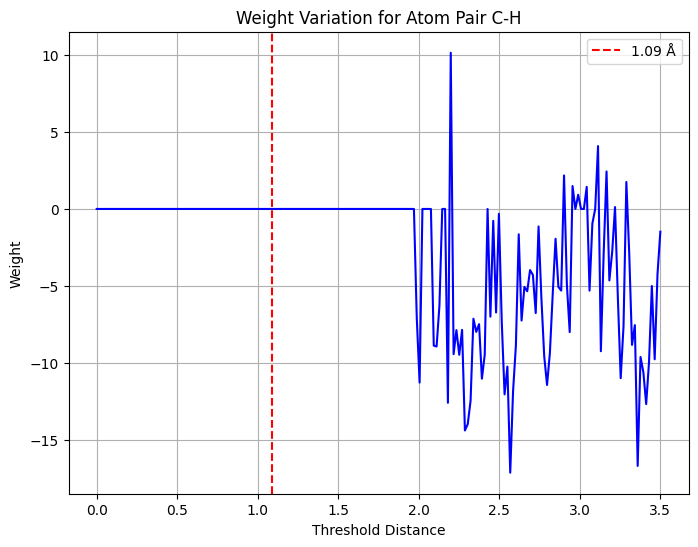

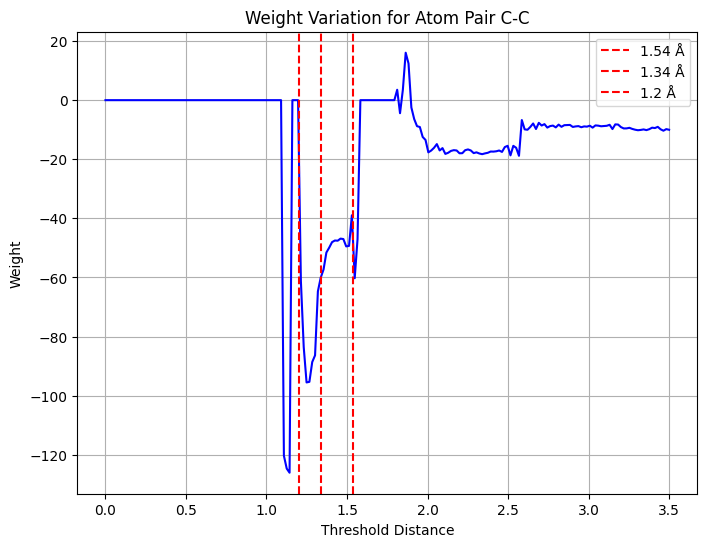

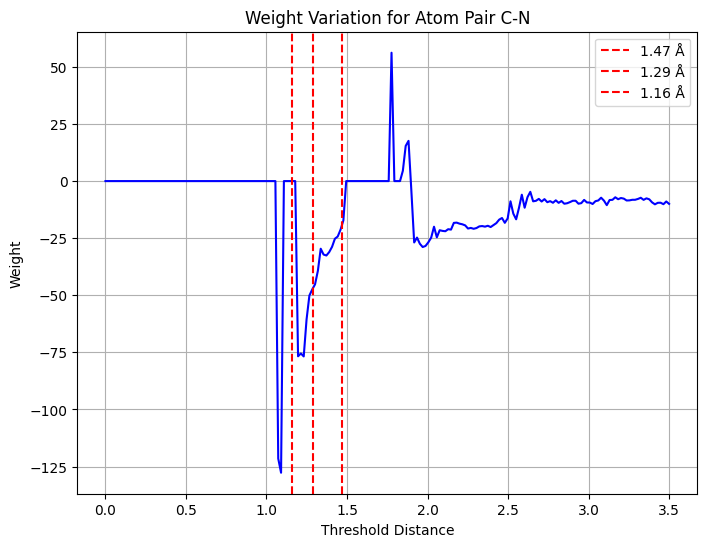

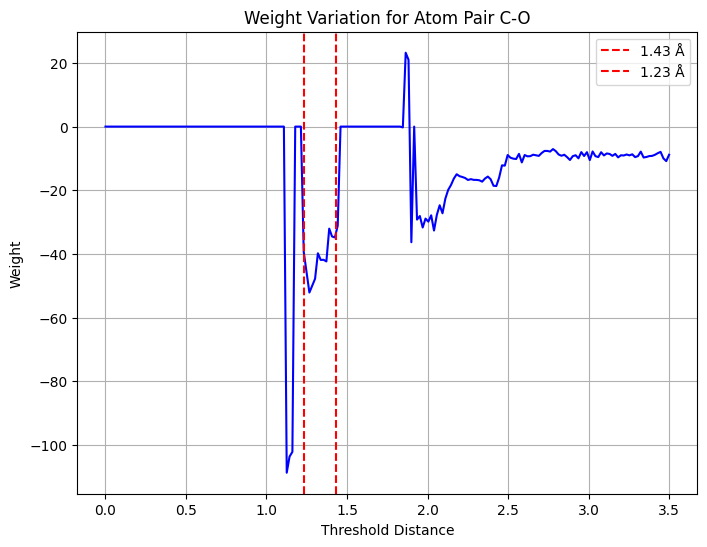

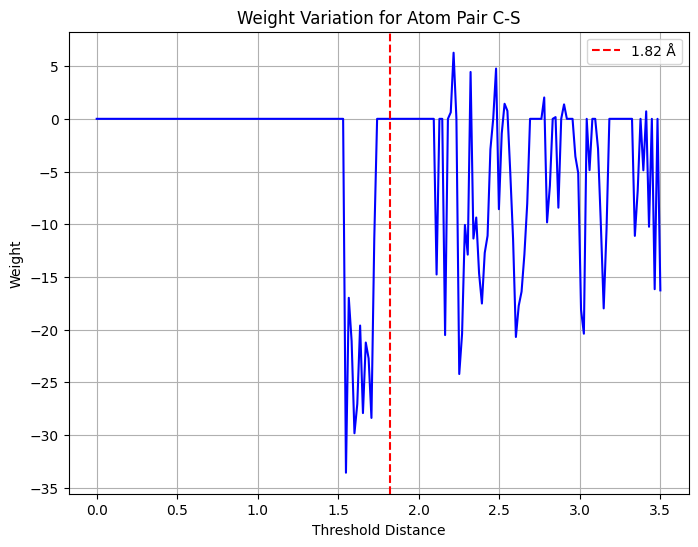

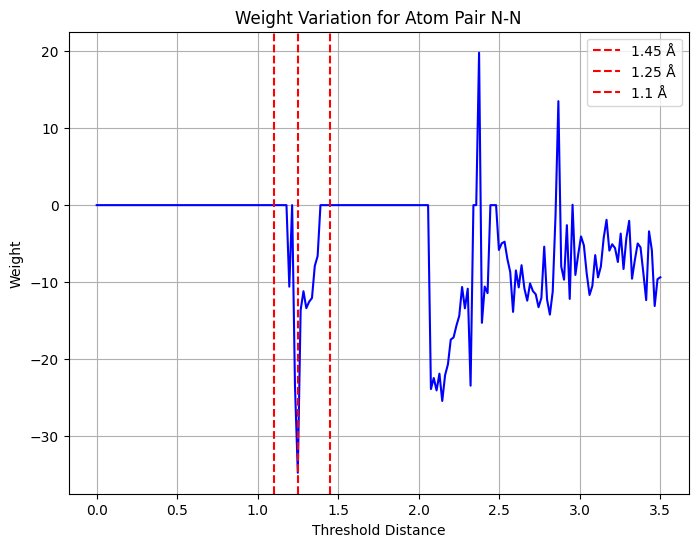

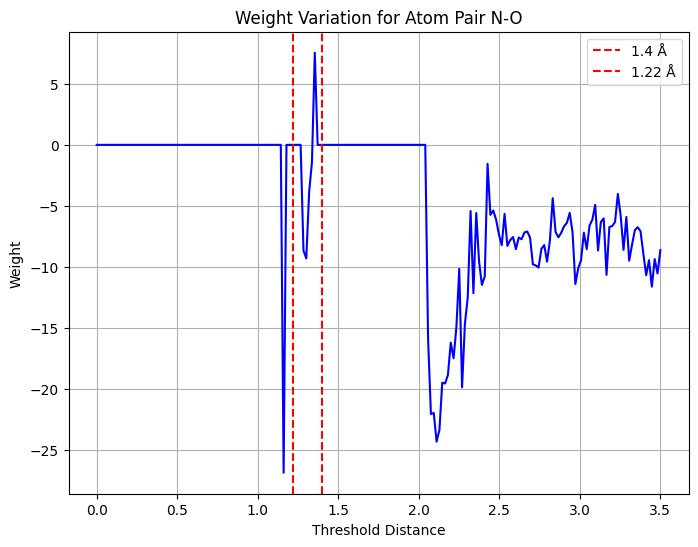

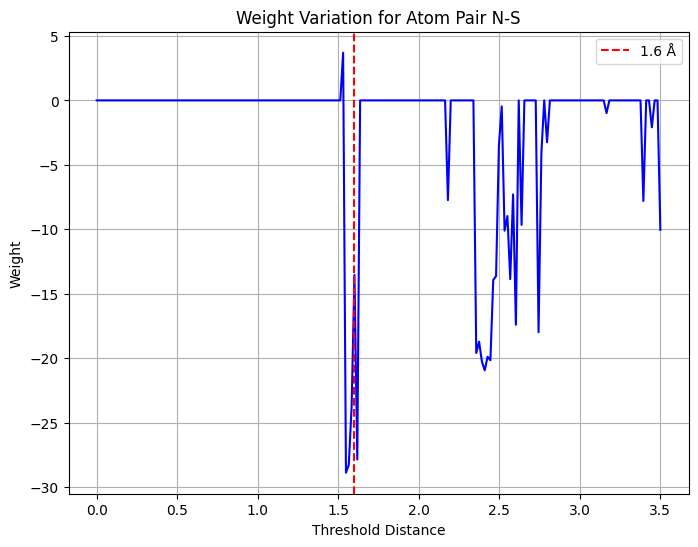

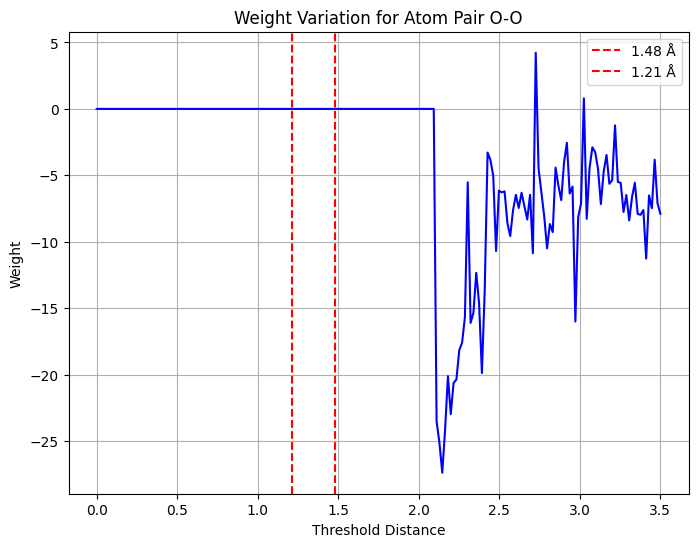

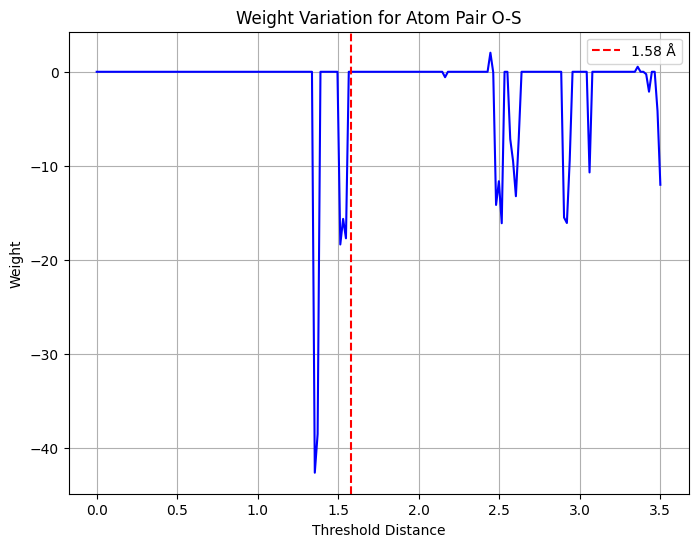

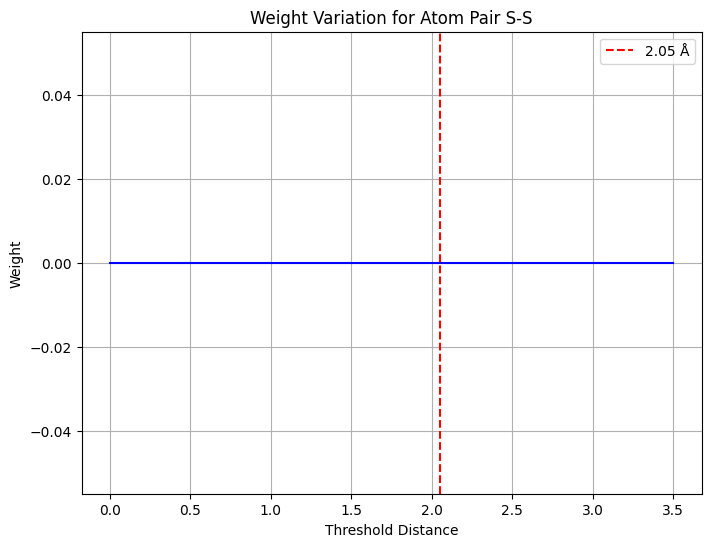

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.interpolate import interp1d  # Import interp1d for interpolation

# Define known bond lengths for different atom pairs
known_bond_lengths = {
    ('H', 'O'): [0.96],  # Single bond
    ('H', 'S'): [1.34],  # Single bond
    ('C', 'H'): [1.09],  # Single bond
    ('H', 'H'): [0.74],  # Single bond
    ('H', 'N'): [1.01],  # Single bond
    ('C', 'C'): [1.54, 1.34, 1.20],  # Single, double, triple bond
    ('C', 'N'): [1.47, 1.29, 1.16],  # Single, double, triple bond
    ('C', 'O'): [1.43, 1.23],  # Single, double bond
    ('C', 'S'): [1.82],  # Single bond
    ('N', 'N'): [1.45, 1.25, 1.10],  # Single, double, triple bond
    ('N', 'O'): [1.40, 1.22],  # Single, double bond
    ('N', 'S'): [1.60],  # Single bond
    ('O', 'O'): [1.48, 1.21],  # Single, double bond
    ('O', 'S'): [1.58],  # Single bond
    ('S', 'S'): [2.05],  # Single bond
}

# Define the function to reshape and group weights by atom pair and distance interval
def reshape_weights(w, num_atom_pairs, num_intervals):
    reshaped_weights = w.reshape(num_atom_pairs, num_intervals + 1)
    return reshaped_weights

# Plot the variation of weights for each atom pair with respect to different threshold distances
def plot_weight_variation(reshaped_weights, atom_pairs, thresholds):
    num_atom_pairs = len(atom_pairs)
    num_intervals = len(thresholds)

    # Interpolate weights to make the plot smoother
    x_interp = np.linspace(thresholds[0], thresholds[-1], 200)  # 200 points for interpolation
    interpolated_weights = np.zeros((num_atom_pairs, 200))

    for i in range(num_atom_pairs):
        f = interp1d(thresholds, reshaped_weights[i, 1:], kind='cubic')
        interpolated_weights[i] = f(x_interp)

    # Plot the interpolated weights
    for i in range(num_atom_pairs):
        plt.figure(figsize=(8, 6))
        plt.plot(x_interp, interpolated_weights[i], marker='', linestyle='-', color='b')

        # Add known bond lengths as vertical lines
        atom_pair = atom_pairs[i]
        if atom_pair in known_bond_lengths:
            for bond_length in known_bond_lengths[atom_pair]:
                plt.axvline(x=bond_length, color='r', linestyle='--', label=f'{bond_length} Å')

        plt.xlabel('Threshold Distance')
        plt.ylabel('Weight')
        plt.title(f'Weight Variation for Atom Pair {atom_pair[0]}-{atom_pair[1]}')
        plt.grid(True)
        plt.legend()
        plt.show()

atom_types = ['H', 'C', 'N', 'O', 'S']
atom_pairs = [(atom1, atom2) for atom1 in atom_types for atom2 in atom_types if atom1 <= atom2]

# Assuming thresholds and w are defined
num_intervals = len(thresholds)  # Number of intervals including the 'None' threshold
reshaped_weights = reshape_weights(w, len(atom_pairs), num_intervals)
plot_weight_variation(reshaped_weights, atom_pairs, thresholds)
